<a href="https://colab.research.google.com/github/ixora99/machine_learning_practice/blob/master/mnist_machine_learning_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import numpy as np
import os, sys
from collections import OrderedDict
!git clone https://github.com/ixora99/deep-learning-from-scratch.git

sys.path.append('deep-learning-from-scratch/')



      

fatal: destination path 'deep-learning-from-scratch' already exists and is not an empty directory.


In [0]:
class Affine:
    def __init__(self,W,b):
      self.W = W
      self.b = b
      self.x = None
      self.dW = None
      self.dB = None
      
    def forward(self,x):
      self.x=x
      return np.dot(x,self.W) + self.b
    
    def backward(self,dout):
      dx=np.dot(dout,self.W.T)
      self.dW=np.dot(self.x.T,dout)
      self.dB=np.sum(dout,axis=0)
      return dx

In [0]:
class sigmoid:
    def __init__(self):
      self.out =None
    def forward(self,x):
      out = 1/(1+np.exp(-x))
      self.out=out
      return out
    def backward(self,dout):
      dx=dout*(1.0-self.out)*self.out
      return dx
    
class Relu:
  def __init__(self):
    self.mask = None
    
  def forward(self,x):
    self.mask=(x<=0)
    out = x.copy()
    out[self.mask]=0
    return out
  def backward(self,dout):
    dout[self.mask]=0
    dx=dout
    return dx
      
  
      

In [0]:
class SoftmaxWithLoss:
  def __inti__(self):
    self.loss = None 
    self.y = None
    self.t = None
    
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.y.shape[0]
    dx = (self.y - self.t) / batch_size
    
    return dx
    
    

In [0]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
  
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

  

In [0]:
class TwoLayerNet:
  def __init__(self,input_size,hidden_size, output_size, weight_init_std=0.01):
    #파라미터
    self.params={}
    self.params['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
    self.params['W2'] = weight_init_std*np.random.randn(hidden_size,output_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['b2'] = np.zeros(output_size)
    
    #레이어
    self.layers=OrderedDict()
    self.layers['Affine1']=Affine(self.params['W1'],self.params['b1'])
    self.layers['Relu'] = Relu()
    self.layers['Affine2']=Affine(self.params['W2'],self.params['b2'])
    self.lastlayer=SoftmaxWithLoss()
    
  def predict(self,x):
    for layer in self.layers.values():
      x=layer.forward(x)
      
    return x
  
  
  def loss(self, x, t):
    y=self.predict(x)
    
    return self.lastlayer.forward(y,t)
  
  
  def accuracy(self,x,t):
    y=self.predict(x)
    y=np.argmax(y,axis=1)
    t=np.argmax(t,axis=1)
    accuracy = np.sum(y==t)/float(x.shape[0])
    
    return accuracy
  
  def gradient(self,x,t):
    #순전파
    self.loss(x,t)
    
    #역전파
    dout=1
    dout=self.lastlayer.backward(dout)
    layers=list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout=layer.backward(dout)
    
    grads={}
    
    grads['W1'] = self.layers['Affine1'].dW
    grads['W2'] = self.layers['Affine2'].dW
    grads['b1'] = self.layers['Affine1'].dB
    grads['b2'] = self.layers['Affine2'].dB
    
    return grads
  
  
  
  
    
    
    
    
    

start
0.0 >
1.0 >2.0 >3.0 >4.0 >5.0 >6.0 >7.0 >8.0 >9.0 >10.0 >
11.0 >12.0 >13.0 >14.0 >15.0 >16.0 >17.0 >18.0 >19.0 >20.0 >
21.0 >22.0 >23.0 >24.0 >25.0 >26.0 >27.0 >28.0 >29.0 >30.0 >
31.0 >32.0 >33.0 >34.0 >35.0 >36.0 >37.0 >38.0 >39.0 >40.0 >
41.0 >42.0 >43.0 >44.0 >45.0 >46.0 >47.0 >48.0 >49.0 >50.0 >
51.0 >52.0 >53.0 >54.0 >55.0 >56.0 >57.0 >58.0 >59.0 >60.0 >
61.0 >62.0 >63.0 >64.0 >65.0 >66.0 >67.0 >68.0 >69.0 >70.0 >
71.0 >72.0 >73.0 >74.0 >75.0 >76.0 >77.0 >78.0 >79.0 >80.0 >
81.0 >82.0 >83.0 >84.0 >85.0 >86.0 >87.0 >88.0 >89.0 >90.0 >
91.0 >92.0 >93.0 >94.0 >95.0 >96.0 >97.0 >98.0 >99.0 >end


<function matplotlib.pyplot.show>

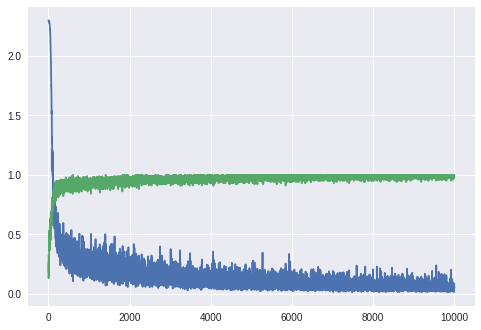

In [199]:
import matplotlib.pyplot as plt

from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size = 50, output_size=10)

iters_num=10000
train_size=x_train.shape[0]
batch_size =100
learning_rate=0.1

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]


for i in range(iters_num):
  batch_mask = np.random.choice(train_size,batch_size)
  x_batch= x_train[batch_mask]
  t_batch= t_train[batch_mask]
  
  grad = network.gradient(x_batch, t_batch)
  for key in ('W1','b1','W2','b2'):
    network.params[key] -= learning_rate*grad[key]
    
  loss = network.loss(x_batch, t_batch)
  accuracy=network.accuracy(x_batch, t_batch)
  train_acc_list.append(accuracy)
  train_loss_list.append(loss)
  if (i==0):
    print('start')
  if (i%100) ==0:
    print(i/100,end=' >')
    if (i%1000)==0:
      print('')

print('end')  
plt.plot(train_loss_list)
plt.show
plt.plot(train_acc_list)
plt.show

